# EDA for match data of tennis

In [1]:
# ライブラリインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 設定
pd.options.display.max_columns = 100
pd.options.display.max_rows = 50

In [2]:
# 訓練データ読み込み
train_dataset = pd.read_csv("../../data/train.tsv", sep='\t')
train_dataset.shape

(471, 46)

In [3]:
train_dataset.head(5)

,id,Tournament,Sex,Year,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,0,FrenchOpen,men,2013,Jarkko Nieminen,Paul-Henri Mathieu,1,1,3,2,69,84,31,29,11.0,4.0,57.0,42.0,6,7,8.0,13.0,172.0,6,4.0,7.0,4.0,6.0,54,58,46,36,7.0,8.0,60.0,71.0,5,15,24.0,33.0,163.0,4,6.0,6.0,6.0,2.0
1,3,AusOpen,women,2013,Varvara Lepchenko,Simona Halep,2,0,1,2,63,34,37,10,1.0,4.0,23.0,47.0,2,2,9.0,10.0,66.0,6,0.0,1.0,NaN,NaN,58,29,42,16,0.0,3.0,10.0,19.0,6,15,1.0,2.0,90.0,4,6.0,6.0,NaN,NaN
2,4,Wimbledon,women,2013,H.Watson,M.Keys,1,0,0,2,53,18,47,13,4.0,2.0,11.0,15.0,5,2,7.0,4.0,NaN,3,5.0,NaN,NaN,NaN,63,25,37,10,8.0,2.0,23.0,18.0,7,5,8.0,5.0,NaN,6,7.0,NaN,NaN,NaN
3,7,USOpen,women,2013,S Williams,F Schiavone,1,1,2,0,51,13,49,12,1.0,0.0,13.0,8.0,9,6,8.0,6.0,NaN,6,6.0,NaN,NaN,NaN,43,8,57,5,0.0,8.0,3.0,18.0,0,0,6.0,3.0,NaN,0,1.0,NaN,NaN,NaN
4,9,AusOpen,women,2013,Tadeja Majeric,Ajla Tomljanovic,1,0,1,2,72,54,28,10,4.0,7.0,4.0,7.0,3,6,NaN,NaN,99.0,6,6.0,4.0,NaN,NaN,49,36,51,25,5.0,6.0,5.0,6.0,3,6,NaN,NaN,97.0,3,7.0,6.0,NaN,NaN


In [4]:
train_dataset.tail(5)

,id,Tournament,Sex,Year,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
466,923,Wimbledon,women,2013,G.Muguruza,E.Makarova,2,0,1,2,58,37,42,21,3.0,6.0,31.0,31.0,9,2,17.0,12.0,NaN,2,7.0,4.0,NaN,NaN,68,49,32,16,7.0,2.0,30.0,14.0,11,5,5.0,4.0,NaN,6,6.0,6.0,NaN,NaN
467,924,USOpen,men,2013,Marcel Granollers,Rajeev Ram,1,1,3,2,62,63,38,28,14.0,4.0,NaN,NaN,6,11,25.0,42.0,145.0,3,4.0,6.0,6.0,7.0,66,66,34,22,11.0,2.0,NaN,NaN,4,10,45.0,79.0,127.0,6,6.0,2.0,3.0,5.0
468,926,Wimbledon,men,2013,K.Nishikori,M.Ebden,1,1,3,0,67,37,33,19,1.0,2.0,32.0,14.0,11,6,26.0,17.0,NaN,6,6.0,6.0,NaN,NaN,61,39,39,12,8.0,6.0,20.0,25.0,2,1,23.0,15.0,NaN,2,4.0,3.0,NaN,NaN
469,930,Wimbledon,men,2013,N.Djokovic,J.Del Potro,6,1,3,2,69,102,31,21,22.0,2.0,80.0,48.0,15,3,56.0,42.0,NaN,7,4.0,7.0,6.0,6.0,60,82,40,42,4.0,4.0,48.0,37.0,7,2,37.0,25.0,NaN,5,6.0,6.0,7.0,3.0
470,931,USOpen,women,2013,A Ivanovic,A Dulgheru,2,1,2,0,64,39,36,12,2.0,4.0,18.0,21.0,6,4,6.0,5.0,NaN,6,6.0,NaN,NaN,NaN,79,33,21,5,1.0,2.0,10.0,26.0,6,0,9.0,6.0,NaN,2,1.0,NaN,NaN,NaN


In [3]:
# テストデータの読み込み
test_dataset = pd.read_csv("../../data/test.tsv", sep='\t')
test_dataset.shape

(472, 45)

In [6]:
test_dataset.head(5)

,id,Tournament,Sex,Year,Player1,Player2,Round,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,1,Wimbledon,women,2013,A.Radwanska,M.Keys,3,2.0,1.0,71,55,29,18,2.0,1.0,23.0,10.0,18.0,3.0,31.0,20.0,NaN,7.0,4.0,6.0,NaN,NaN,61,53,39,16,15.0,1.0,67.0,51.0,10.0,2.0,34.0,22.0,NaN,5.0,6.0,3.0,NaN,NaN
1,2,AusOpen,men,2013,Nick Kyrgios,Benjamin Becker,1,3.0,1.0,54,60,46,25,34.0,13.0,71.0,52.0,6.0,8.0,5.0,8.0,133.0,6.0,6.0,6.0,7.0,NaN,53,45,47,31,12.0,5.0,38.0,36.0,3.0,7.0,6.0,6.0,114.0,3.0,7.0,2.0,6.0,NaN
2,5,Wimbledon,men,2013,V.Pospisil,M.Youzhny,2,2.0,3.0,63,83,37,25,26.0,2.0,66.0,27.0,7.0,2.0,61.0,39.0,NaN,2.0,7.0,6.0,6.0,4.0,64,76,36,39,8.0,2.0,53.0,20.0,7.0,4.0,46.0,32.0,NaN,6.0,6.0,7.0,3.0,6.0
3,6,FrenchOpen,women,2013,Caroline Wozniacki,Bojana Jovanovski,2,0.0,2.0,70,29,30,10,1.0,3.0,13.0,18.0,2.0,3.0,5.0,7.0,62.0,6.0,3.0,NaN,NaN,NaN,68,34,32,8,3.0,1.0,33.0,32.0,3.0,7.0,2.0,5.0,72.0,7.0,6.0,NaN,NaN,NaN
4,8,Wimbledon,men,2013,N.Djokovic,J.Chardy,3,3.0,0.0,74,40,26,12,8.0,1.0,38.0,3.0,16.0,5.0,21.0,18.0,NaN,6.0,6.0,6.0,NaN,NaN,66,32,34,15,6.0,4.0,18.0,14.0,0.0,0.0,23.0,12.0,NaN,3.0,2.0,2.0,NaN,NaN


In [7]:
test_dataset.tail(5)

,id,Tournament,Sex,Year,Player1,Player2,Round,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
467,938,FrenchOpen,women,2013,Vania King,Alexandra Cadantu,1,2.0,0.0,74,27,26,11,NaN,0.0,38.0,15.0,6.0,9.0,14.0,21.0,83.0,7.0,6.0,NaN,NaN,NaN,72,28,28,9,NaN,5.0,21.0,17.0,3.0,8.0,5.0,9.0,64.0,6.0,1.0,NaN,NaN,NaN
468,939,FrenchOpen,women,2013,Alize Cornet,Maria Joao Koehler,1,2.0,0.0,70,28,30,11,NaN,3.0,16.0,19.0,6.0,9.0,7.0,9.0,72.0,7.0,6.0,NaN,NaN,NaN,60,19,40,8,NaN,9.0,20.0,45.0,3.0,8.0,4.0,8.0,58.0,5.0,2.0,NaN,NaN,NaN
469,940,AusOpen,women,2013,Monica Niculescu,Sabine Lisicki,2,2.0,1.0,66,35,34,9,0.0,6.0,8.0,18.0,7.0,14.0,12.0,16.0,87.0,2.0,6.0,6.0,NaN,NaN,53,23,47,14,10.0,6.0,43.0,56.0,5.0,6.0,19.0,34.0,76.0,6.0,2.0,2.0,NaN,NaN
470,941,AusOpen,women,2013,Eugenie Bouchard,Lauren Davis,3,2.0,0.0,61,23,39,10,4.0,2.0,18.0,23.0,5.0,8.0,3.0,5.0,67.0,6.0,6.0,NaN,NaN,NaN,77,24,23,3,0.0,1.0,7.0,31.0,1.0,3.0,3.0,4.0,43.0,2.0,2.0,NaN,NaN,NaN
471,942,AusOpen,men,2013,Guillermo Garcia-Lopez,Tommy Haas,1,2.0,0.0,58,27,42,11,7.0,3.0,19.0,9.0,4.0,4.0,3.0,5.0,65.0,7.0,5.0,NaN,NaN,NaN,52,22,48,11,4.0,7.0,18.0,35.0,1.0,2.0,10.0,10.0,55.0,5.0,2.0,NaN,NaN,NaN


In [8]:
# 基礎集計
train_dataset.describe()

,id,Year,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
count,471.000000,471.0,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,462.000000,468.000000,408.000000,408.000000,471.000000,471.000000,426.000000,427.000000,315.000000,471.000000,469.000000,314.000000,129.000000,51.000000,471.000000,471.000000,471.000000,471.000000,462.000000,468.000000,408.000000,408.000000,471.000000,471.000000,426.000000,427.000000,315.000000,471.000000,469.000000,314.000000,129.000000,51.000000
mean,470.908705,2013.0,1.870488,0.475584,1.469214,1.575372,61.840764,39.252654,38.180467,17.110403,6.432900,3.685897,28.220588,28.041667,5.265393,7.150743,15.631455,17.660422,96.488889,4.692144,4.742004,4.684713,4.767442,4.803922,61.836518,39.373673,38.163482,17.295117,5.937229,3.848291,27.821078,27.963235,5.288747,7.333333,16.293427,18.079625,97.980952,4.794055,4.767591,4.923567,4.813953,5.176471
std,269.179909,0.0,1.321749,0.499934,1.158965,1.173352,7.624855,18.195799,7.599225,8.996247,6.076772,2.656182,17.200948,15.168852,3.946403,5.215015,12.119516,12.210763,38.553739,1.978803,1.949020,2.088908,2.021415,2.126214,8.107314,18.203591,8.107314,9.186250,6.014296,2.901018,16.001684,16.451287,3.776391,5.183991,12.908576,13.538442,38.608021,1.925762,1.965334,1.843879,1.869857,1.946339
min,0.000000,2013.0,1.000000,0.000000,0.000000,0.000000,41.000000,8.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,6.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,226.500000,2013.0,1.000000,0.000000,0.000000,0.000000,57.000000,26.000000,33.000000,10.000000,2.000000,2.000000,16.000000,17.000000,2.000000,3.000000,7.000000,8.000000,67.000000,3.000000,3.000000,3.000000,3.000000,3.500000,57.000000,25.500000,33.000000,10.000000,2.000000,2.000000,15.750000,16.000000,2.500000,3.000000,8.000000,8.000000,65.000000,3.000000,3.000000,3.250000,3.000000,4.000000
50%,486.000000,2013.0,1.000000,0.000000,2.000000,2.000000,62.000000,37.000000,38.000000,15.000000,5.000000,3.000000,25.000000,26.000000,5.000000,6.000000,13.000000,15.000000,92.000000,6.000000,6.000000,6.000000,6.000000,6.000000,62.000000,37.000000,38.000000,16.000000,4.000000,3.000000,26.000000,25.000000,5.000000,7.000000,13.000000,15.000000,95.000000,6.000000,6.000000,6.000000,6.000000,6.000000
75%,700.000000,2013.0,2.000000,1.000000,2.000000,3.000000,67.000000,51.000000,43.000000,23.000000,9.000000,5.000000,36.000000,37.000000,7.000000,10.000000,21.000000,25.000000,123.000000,6.000000,6.000000,6.000000,6.000000,6.000000,67.000000,51.000000,43.000000,23.000000,8.000000,5.000000,37.000000,37.000000,7.000000,11.000000,21.000000,24.000000,127.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,931.000000,2013.0,7.000000,1.000000,3.000000,3.000000,86.000000,109.000000,59.000000,47.000000,41.000000,18.000000,111.000000,81.000000,20.000000,28.000000,96.000000,62.000000,231.000000,7.000000,7.000000,9.000000,7.000000,9.000000,93.000000,114.000000,61.000000,57.000000,39.000000,18.000000,95.000000,96.000000,25.000000,26.000000,82.000000,81.000000,230.000000,7.000000,7.000000,9.000000,7.000000,9.000000


In [9]:
test_dataset.describe()

,id,Year,Round,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
count,472.000000,472.0,472.000000,471.000000,471.000000,472.000000,472.000000,472.000000,472.000000,459.000000,467.000000,409.000000,409.000000,471.000000,471.000000,433.000000,433.000000,316.000000,471.000000,470.000000,308.000000,92.000000,35.000000,472.000000,472.000000,472.000000,472.000000,459.000000,467.000000,409.000000,409.000000,471.000000,471.000000,433.000000,433.000000,316.000000,471.000000,470.000000,308.000000,92.000000,35.000000
mean,471.091102,2013.0,1.817797,1.511677,1.409766,62.671610,38.319915,37.391949,16.349576,5.845316,3.597430,26.853301,26.523227,5.356688,7.138004,15.452656,16.676674,92.079114,4.910828,4.819149,4.772727,4.815217,4.428571,62.097458,38.004237,37.944915,16.561441,6.028322,3.695931,27.775061,27.391198,5.129512,6.857749,15.598152,17.106236,91.072785,4.838641,4.623404,4.720779,4.565217,5.057143
std,275.792189,0.0,1.184051,1.155639,1.168665,8.194828,16.755687,8.212735,8.193690,5.794896,2.643446,15.121177,13.721140,4.033919,5.046176,11.764007,11.061982,34.368822,1.863567,1.869761,1.870473,1.966362,2.033336,8.636013,16.825064,8.658485,8.256532,6.026621,2.587865,15.519541,14.456104,3.885899,4.858743,11.938507,12.173240,34.993121,1.870110,1.931858,1.891165,1.928983,1.696759
min,1.000000,2013.0,1.000000,0.000000,0.000000,38.000000,3.000000,15.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,240.750000,2013.0,1.000000,0.000000,0.000000,57.000000,27.000000,32.000000,10.000000,2.000000,2.000000,16.000000,17.000000,3.000000,3.000000,8.000000,9.000000,66.000000,4.000000,4.000000,3.000000,4.000000,3.000000,56.000000,25.000000,33.000000,10.750000,1.000000,2.000000,17.000000,16.000000,2.000000,3.000000,7.000000,8.000000,63.750000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,457.000000,2013.0,1.000000,2.000000,2.000000,63.000000,36.000000,37.000000,15.000000,4.000000,3.000000,25.000000,26.000000,5.000000,6.000000,13.000000,14.000000,90.000000,6.000000,6.000000,6.000000,6.000000,5.000000,62.000000,35.000000,38.000000,15.000000,4.000000,3.000000,25.000000,26.000000,5.000000,6.000000,12.000000,14.000000,89.500000,6.000000,6.000000,6.000000,6.000000,6.000000
75%,717.250000,2013.0,2.000000,2.000000,2.000000,68.000000,48.000000,43.000000,22.000000,8.000000,5.000000,35.000000,35.000000,7.000000,10.500000,20.000000,22.000000,112.000000,6.000000,6.000000,6.000000,6.000000,6.000000,67.000000,47.000000,44.000000,21.000000,9.000000,5.000000,38.000000,37.000000,7.000000,10.000000,21.000000,23.000000,113.250000,6.000000,6.000000,6.000000,6.000000,6.000000
max,942.000000,2013.0,7.000000,3.000000,3.000000,85.000000,99.000000,62.000000,52.000000,34.000000,14.000000,85.000000,89.000000,25.000000,24.000000,87.000000,63.000000,224.000000,7.000000,7.000000,8.000000,7.000000,7.000000,89.000000,132.000000,100.000000,47.000000,36.000000,15.000000,92.000000,72.000000,21.000000,26.000000,64.000000,80.000000,213.000000,7.000000,7.000000,9.000000,7.000000,8.000000


In [10]:
train_dataset.info

<bound method DataFrame.info of       id  Tournament    Sex  Year            Player1             Player2  \
0      0  FrenchOpen    men  2013    Jarkko Nieminen  Paul-Henri Mathieu   
1      3     AusOpen  women  2013  Varvara Lepchenko        Simona Halep   
2      4   Wimbledon  women  2013           H.Watson              M.Keys   
3      7      USOpen  women  2013         S Williams         F Schiavone   
4      9     AusOpen  women  2013     Tadeja Majeric    Ajla Tomljanovic   
..   ...         ...    ...   ...                ...                 ...   
466  923   Wimbledon  women  2013         G.Muguruza          E.Makarova   
467  924      USOpen    men  2013  Marcel Granollers          Rajeev Ram   
468  926   Wimbledon    men  2013        K.Nishikori             M.Ebden   
469  930   Wimbledon    men  2013         N.Djokovic         J.Del Potro   
470  931      USOpen  women  2013         A Ivanovic          A Dulgheru   

     Round  Result  FNL.1  FNL.2  FSP.1  FSW.1  SSP.1  

c:\Users\Public\Anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\Public\Anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\Public\Anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


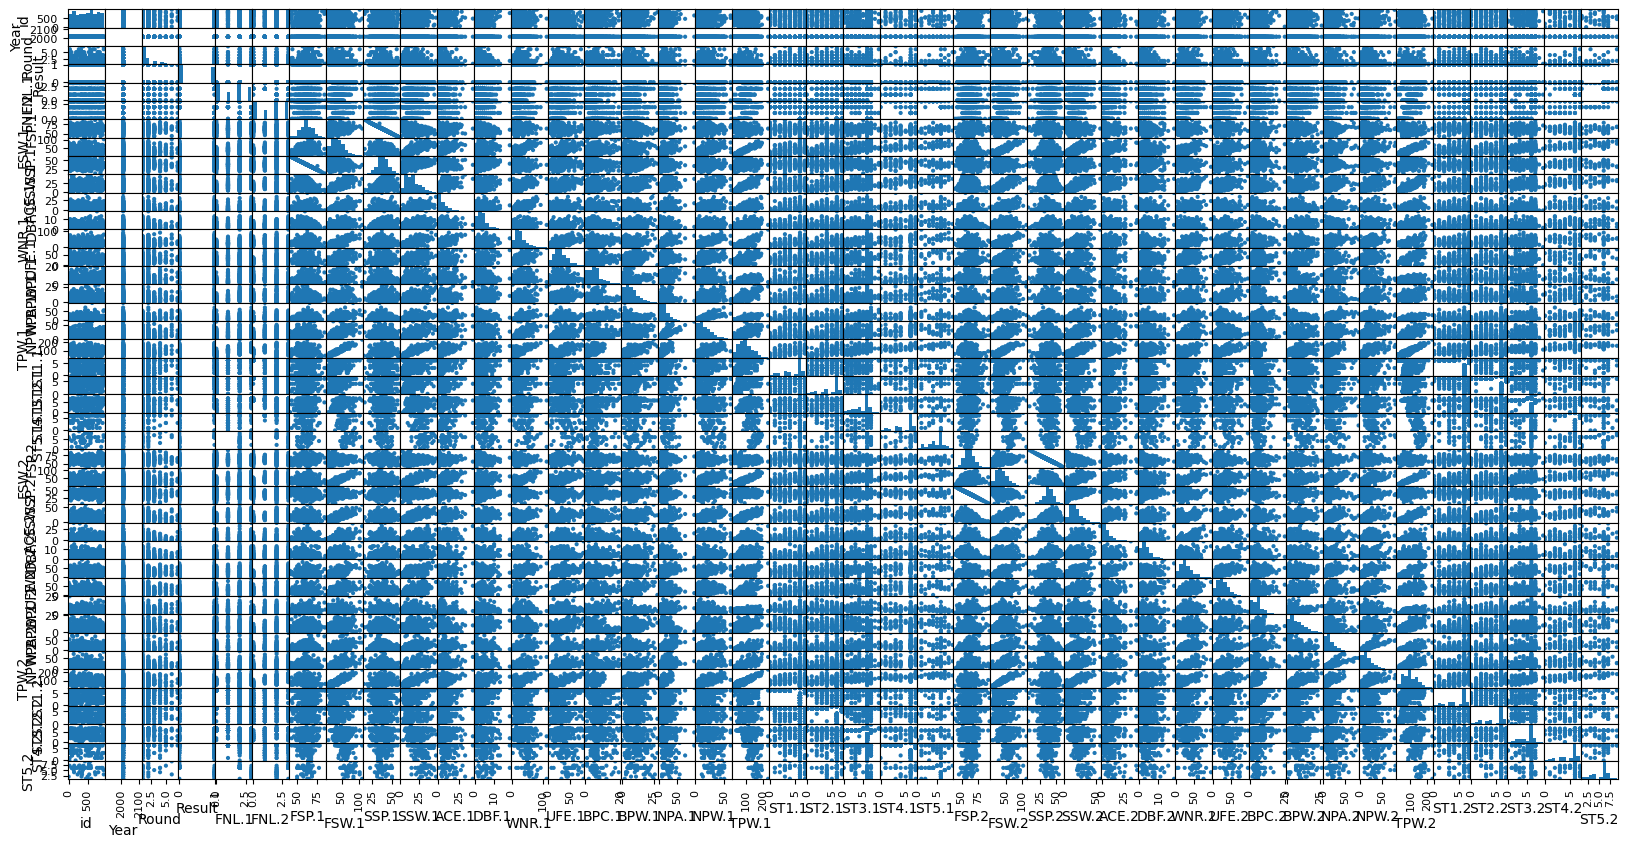

In [11]:
# ヒストグラムと散布図の行列を作成
# from pandas.plotting import scatter_matrix
# x = pd.plotting.scatter_matrix(train_dataset, alpha=1, figsize=(20, 10), diagonal='hist')

In [12]:
train_dataset.isnull().sum()

id              0
Tournament      0
Sex             0
Year            0
Player1         0
Player2         0
Round           0
Result          0
FNL.1           0
FNL.2           0
FSP.1           0
FSW.1           0
SSP.1           0
SSW.1           0
ACE.1           9
DBF.1           3
WNR.1          63
UFE.1          63
BPC.1           0
BPW.1           0
NPA.1          45
NPW.1          44
TPW.1         156
ST1.1           0
ST2.1           2
ST3.1         157
ST4.1         342
ST5.1         420
FSP.2           0
FSW.2           0
SSP.2           0
SSW.2           0
ACE.2           9
DBF.2           3
WNR.2          63
UFE.2          63
BPC.2           0
BPW.2           0
NPA.2          45
NPW.2          44
TPW.2         156
ST1.2           0
ST2.2           2
ST3.2         157
ST4.2         342
ST5.2         420
dtype: int64

In [14]:
train_dataset.fillna(0, inplace=True)
train_dataset.isnull().sum()

id            0
Tournament    0
Sex           0
Year          0
Player1       0
Player2       0
Round         0
Result        0
FNL.1         0
FNL.2         0
FSP.1         0
FSW.1         0
SSP.1         0
SSW.1         0
ACE.1         0
DBF.1         0
WNR.1         0
UFE.1         0
BPC.1         0
BPW.1         0
NPA.1         0
NPW.1         0
TPW.1         0
ST1.1         0
ST2.1         0
ST3.1         0
ST4.1         0
ST5.1         0
FSP.2         0
FSW.2         0
SSP.2         0
SSW.2         0
ACE.2         0
DBF.2         0
WNR.2         0
UFE.2         0
BPC.2         0
BPW.2         0
NPA.2         0
NPW.2         0
TPW.2         0
ST1.2         0
ST2.2         0
ST3.2         0
ST4.2         0
ST5.2         0
dtype: int64

In [15]:
test_dataset.isnull().sum()

id              0
Tournament      0
Sex             0
Year            0
Player1         0
Player2         0
Round           0
FNL.1           1
FNL.2           1
FSP.1           0
FSW.1           0
SSP.1           0
SSW.1           0
ACE.1          13
DBF.1           5
WNR.1          63
UFE.1          63
BPC.1           1
BPW.1           1
NPA.1          39
NPW.1          39
TPW.1         156
ST1.1           1
ST2.1           2
ST3.1         164
ST4.1         380
ST5.1         437
FSP.2           0
FSW.2           0
SSP.2           0
SSW.2           0
ACE.2          13
DBF.2           5
WNR.2          63
UFE.2          63
BPC.2           1
BPW.2           1
NPA.2          39
NPW.2          39
TPW.2         156
ST1.2           1
ST2.2           2
ST3.2         164
ST4.2         380
ST5.2         437
dtype: int64

In [16]:
test_dataset.fillna(0, inplace=True)
test_dataset.isnull().sum()

id            0
Tournament    0
Sex           0
Year          0
Player1       0
Player2       0
Round         0
FNL.1         0
FNL.2         0
FSP.1         0
FSW.1         0
SSP.1         0
SSW.1         0
ACE.1         0
DBF.1         0
WNR.1         0
UFE.1         0
BPC.1         0
BPW.1         0
NPA.1         0
NPW.1         0
TPW.1         0
ST1.1         0
ST2.1         0
ST3.1         0
ST4.1         0
ST5.1         0
FSP.2         0
FSW.2         0
SSP.2         0
SSW.2         0
ACE.2         0
DBF.2         0
WNR.2         0
UFE.2         0
BPC.2         0
BPW.2         0
NPA.2         0
NPW.2         0
TPW.2         0
ST1.2         0
ST2.2         0
ST3.2         0
ST4.2         0
ST5.2         0
dtype: int64